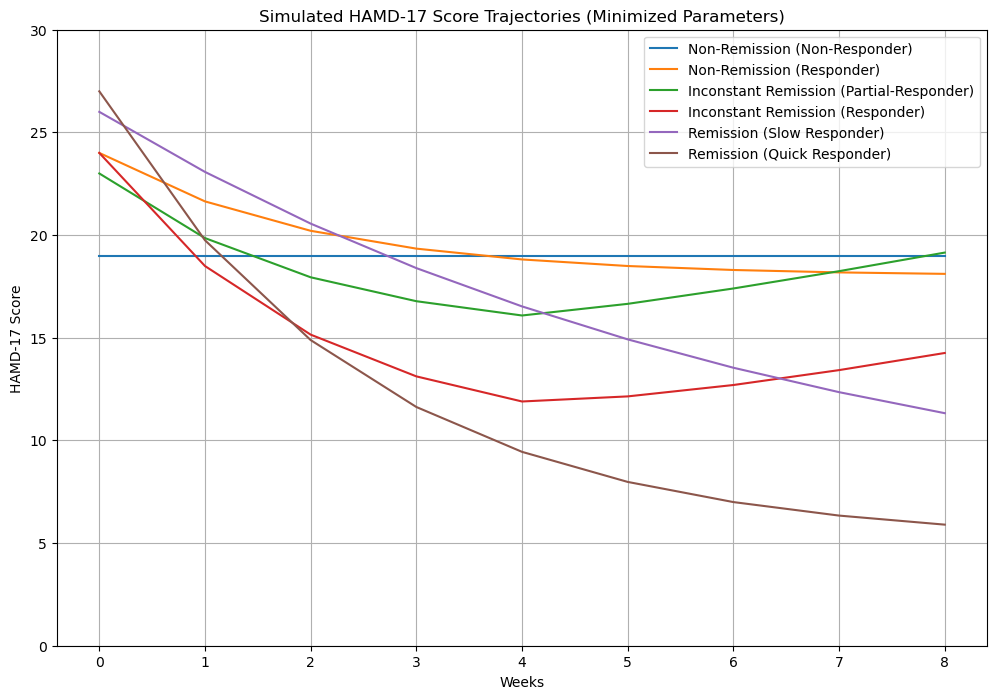

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def hamd_model_min_params(baseline, reduction_rate, residual_score, rebound_start=None, rebound_rate=0, rebound_steepness=5, weeks=8):
    """
    Simulates HAMD-17 score changes with clinically interpretable parameters.

    Args:
        baseline (float): The initial HAMD-17 score at the start of treatment (week 0).
        reduction_rate (float): The rate of the initial exponential decrease in the HAMD-17 score.
                               A higher value means a faster initial response to treatment.
        residual_score (float): The lowest HAMD-17 score the patient would reach if there were no rebound.
                               This represents the potential treatment effect in the absence of worsening.
        rebound_start (int, optional): The week at which the rebound starts. If None, no rebound is modeled.
        rebound_rate (float, optional): The rate of increase in the HAMD-17 score during the rebound.
                                      A higher value means a faster worsening of symptoms.
        rebound_steepness (float, optional): Controls how abruptly the rebound starts. Higher values make the rebound more sudden.
        stable_bounce (bool, optional): If True, the rebound stabilizes at stable_value. If False, the rebound continues.
        stable_value (float, optional): The HAMD-17 score at which the stable bounce-back plateaus. Only used if stable_bounce is True.
        weeks (int, optional): The total number of weeks to simulate.

    Returns:
        list: A list of HAMD-17 scores for each week.
    """
    hamd_scores = []
    for week in range(weeks + 1):
        hamd = residual_score + (baseline - residual_score) * np.exp(-reduction_rate * week)

        if rebound_start is not None:  # Only apply rebound if rebound_start is provided
            rebound_factor = 1 / (1 + np.exp(-rebound_steepness * (week - rebound_start)))
            rebound_increase = rebound_rate * (week - rebound_start) * rebound_factor
            hamd += rebound_increase

        hamd_scores.append(hamd)
    return hamd_scores

# Scenario Parameters (Estimates) - Using minimum parameters
scenarios = {
    "Non-Remission (Non-Responder)": {"baseline": 19, "reduction_rate": 0.01, "residual_score": 19},
    "Non-Remission (Responder)": {"baseline": 24, "reduction_rate": 0.5, "residual_score": 18},
    "Inconstant Remission (Partial-Responder)": {"baseline": 23, "reduction_rate": 0.5, "residual_score": 15, "rebound_start": 4, "rebound_rate": 1},
    "Inconstant Remission (Responder)": {"baseline": 24, "reduction_rate": 0.5, "residual_score": 10, "rebound_start": 4, "rebound_rate": 1},
    "Remission (Slow Responder)": {"baseline": 26, "reduction_rate": 0.15, "residual_score": 5},
    "Remission (Quick Responder)": {"baseline": 27, "reduction_rate": 0.4, "residual_score": 5},
}

weeks = 8

# Plotting
plt.figure(figsize=(12, 8))
for scenario_name, params in scenarios.items():
  hamd_scores = hamd_model_min_params(**params, weeks=weeks)
  plt.plot(range(weeks + 1), hamd_scores, label=scenario_name)

plt.xlabel("Weeks")
plt.ylabel("HAMD-17 Score")
plt.title("Simulated HAMD-17 Score Trajectories (Minimized Parameters)")
plt.legend()
plt.grid(True)
plt.xticks(range(weeks+1))
plt.ylim(0,30)
plt.show()